In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [ ]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")


In [ ]:
# Declare a Base using `automap_base()`
Base = automap_base()


# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [18]:
# Print all of the classes mapped to the Base
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [23]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
# Create a session
session = Session(engine)


# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.
from sqlalchemy import desc


most_recent_measurement = list(session.query(Measurement.date).order_by(desc(Measurement.date)).first())[0]
print(most_recent_measurement)


2017-08-23


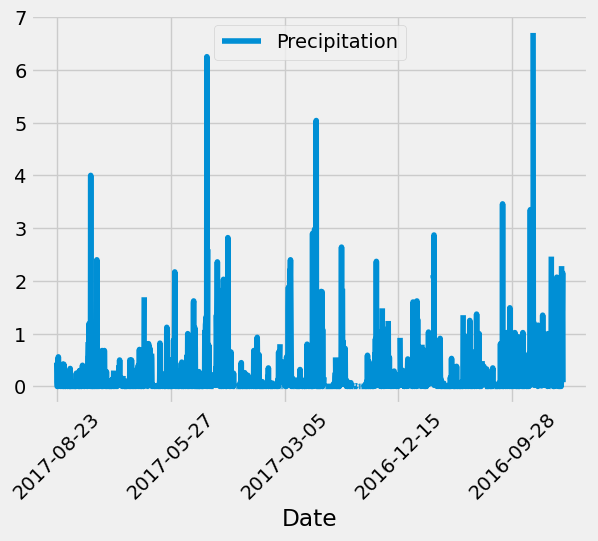

In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
one_year  = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
past_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(past_year, columns=["Date", "Precipitation"])

# Sort the dataframe by date
precipitation_df.sort_values("Date", inplace=True, ascending=False)
precipitation_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x="Date", y="Precipitation", rot=45)
plt.show()

In [60]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df.describe()
print(summary_stats)

       Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number of stations in the dataset
num_of_stations = session.query(Station).count()

print(num_of_stations)

9


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(
    Measurement.station
).order_by(
    func.count(Measurement.station).desc()
).first()

station_name = list(most_active_station)[0]

print(station_name)

USC00519281


In [75]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
avg_lowest_temp = session.query(
    Measurement.station,
    func.avg(Measurement.tobs).label('avg_temp'),
    func.min(Measurement.tobs).label('lowest_temp'), 
    func.max(Measurement.tobs).label('highest_temp')
).filter(Measurement.station == "USC00519281").first()

print(avg_lowest_temp)

('USC00519281', 71.66378066378067, 54.0, 85.0)


[(77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), 

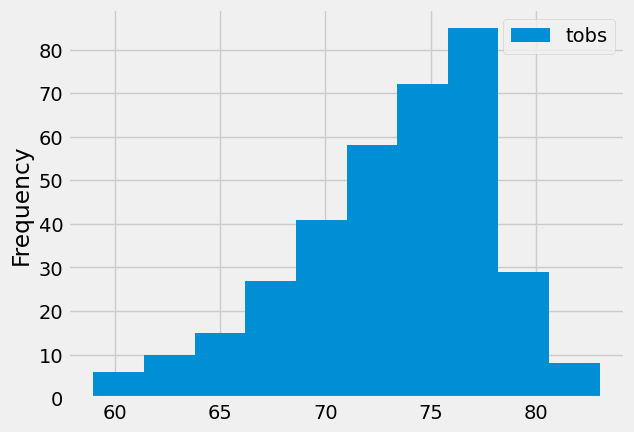

In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Calculate the date one year from the last date in data set.

past_year_station = session.query(Measurement.tobs).filter(
    Measurement.date > one_year
).filter(Measurement.station == "USC00519281").all()
print(past_year_station)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
past_year_station_df = pd.DataFrame(past_year_station)

# Use Pandas Plotting with Matplotlib to plot the data
past_year_station_df.plot.hist()
plt.show()

# Close Session

In [87]:
# Close Session
session.close()
